In [50]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_file = os.listdir('../output_new/')
model_file = [i for i in model_file if 'model_result' in i]
model_file

['AAPL_model_result.csv',
 'MSFT_model_result.csv',
 'IBM_model_result.csv',
 'SBUX_model_result.csv',
 'KO_model_result.csv',
 'CAT_model_result.csv',
 'BAC_model_result.csv',
 'GS_model_result.csv',
 'OEX_model_result.csv',
 'WMT_model_result.csv',
 'TSLA_model_result.csv',
 'TLT_model_result.csv',
 'NDX_model_result.csv',
 'RUT_model_result.csv',
 'NKE_model_result.csv',
 'JPM_model_result.csv',
 'BA_model_result.csv',
 'AMZN_model_result.csv',
 'DJI_model_result.csv',
 'DIS_model_result.csv']

In [187]:
df_model_list = []

for file_name in model_file:
    file_location = '../output_new/' + file_name
    ticker_name = file_name.split('_')[0]
    df = pd.read_csv(file_location)
    df.columns = ['col', 'tuning_sharpe', 'tuning_rmse', 'tuning_spearmanr', 'cagr',
       'train_sharpe_ratio', 'calmar', 'test_spearmanr', 'test_sharpe',
       'test_rmse', 'model_name']

    metrics_name = ['tuning_sharpe', 'tuning_rmse', 'tuning_spearmanr', 'cagr',
       'train_sharpe_ratio', 'calmar', 'test_spearmanr', 'test_sharpe',
       'test_rmse']
    model = ['ridge','rf','gb']
    df['ticker_name'] = ticker_name
    for i in metrics_name:
        df[i + '_rank'] = df.groupby("model_name")[i].rank(ascending=False)
    df_model_list.append(df)
df_model = pd.concat(df_model_list)
df_model = df_model.replace([np.inf, -np.inf], np.nan,)

In [188]:
df_model.columns

Index(['col', 'tuning_sharpe', 'tuning_rmse', 'tuning_spearmanr', 'cagr',
       'train_sharpe_ratio', 'calmar', 'test_spearmanr', 'test_sharpe',
       'test_rmse', 'model_name', 'ticker_name', 'tuning_sharpe_rank',
       'tuning_rmse_rank', 'tuning_spearmanr_rank', 'cagr_rank',
       'train_sharpe_ratio_rank', 'calmar_rank', 'test_spearmanr_rank',
       'test_sharpe_rank', 'test_rmse_rank'],
      dtype='object')

In [166]:
df_model[ (df_model['col'].isin(['base','RSI_20','RSI_20_ta','RSI_25','RSI_25_ta'])) & (df_model['ticker_name'] == 'BA') & (df_model['model_name'] == 'ridge')]

,col,tuning_sharpe,tuning_rmse,tuning_spearmanr,cagr,train_sharpe_ratio,calmar,test_spearmanr,test_sharpe,test_rmse,...,ticker_name,tuning_sharpe_rank,tuning_rmse_rank,tuning_spearmanr_rank,cagr_rank,train_sharpe_ratio_rank,calmar_rank,test_spearmanr_rank,test_sharpe_rank,test_rmse_rank
0,base,0.226956,-0.015068,0.005851,0.269099,1.100045,0.729658,0.035699,-0.035018,0.001307,...,BA,17.0,12.0,18.0,12.5,12.5,17.5,10.0,8.5,14.0
1,RSI_20,0.492036,-0.015042,0.017103,0.342724,1.332795,1.079708,0.030535,-0.106545,0.001309,...,BA,8.0,7.0,9.0,7.0,7.0,7.0,15.0,14.0,7.0
2,RSI_20_ta,0.525983,-0.015054,0.006820,0.279695,1.134126,0.936254,0.016325,-0.152686,0.001314,...,BA,6.0,9.0,15.0,11.0,11.0,11.0,19.0,15.0,4.0
3,RSI_25,0.380599,-0.015051,0.012037,0.322816,1.271056,0.972811,0.030915,-0.097119,0.001309,...,BA,13.0,8.0,12.0,8.0,8.0,9.0,14.0,13.0,9.0
4,RSI_25_ta,0.474202,-0.015064,0.006781,0.267589,1.094887,0.774655,0.019284,-0.219062,0.001310,...,BA,9.0,11.0,16.0,14.0,14.0,15.0,18.0,18.0,5.0


# CAGR basemodel VS other models

In [167]:
indicator_list = list(set(df_model['col']))
print(len(indicator_list))
col = sns.color_palette("husl", len(indicator_list)).as_hex()
col = pd.DataFrame( {'col':indicator_list, 'color':col})
col.loc[(col['col'] == 'base'),'color'] = 'black'

19


In [168]:

def plot_model_vs_baseline(df_model, key = 'test_rmse', color_df = col ,ascending = False):

    df_model_ridge = df_model[df_model['model_name'] == 'ridge']
    df_model_ridge = df_model_ridge.groupby(['col']).mean().reset_index()
    df_model_ridge = df_model_ridge.merge(color_df, on = 'col')
    df_model_ridge = df_model_ridge.sort_values([key], ascending= ascending)


    df_model_rf = df_model[df_model['model_name'] == 'rf']
    df_model_rf = df_model_rf.groupby(['col']).mean().reset_index()
    df_model_rf = df_model_rf.merge(color_df, on = 'col')
    df_model_rf = df_model_rf.sort_values([key], ascending= ascending)

    df_model_gbm = df_model[df_model['model_name'] == 'gb']
    df_model_gbm = df_model_ridge.groupby(['col']).mean().reset_index()
    df_model_gbm = df_model_gbm.merge(color_df, on = 'col')
    df_model_gbm = df_model_gbm.sort_values([key], ascending= ascending)

    df_model_all = df_model.groupby(['col']).mean().reset_index()
    df_model_all = df_model_all.merge(color_df, on = 'col')
    df_model_all = df_model_all.sort_values([key], ascending= ascending)

    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(18.5, 10.5)
    if('train' in key): title_key = key.replace('train_','')
    else: title_key = key
    fig.suptitle(f'Model {title_key} with baseline model')

    axs[0,0].barh(df_model_ridge['col'], df_model_ridge[key], color=df_model_ridge['color'])
    axs[0,0].title.set_text('Ridge')
    axs[0,1].barh(df_model_rf['col'], df_model_rf[key], color=df_model_rf['color'])
    axs[0,1].title.set_text('Random Forest')
    axs[1,0].barh(df_model_gbm['col'], df_model_gbm[key], color=df_model_gbm['color'])
    axs[1,0].title.set_text('GBM')

    axs[1,1].barh(df_model_all['col'], df_model_all[key], color=df_model_all['color'])
    axs[1,1].title.set_text('All')

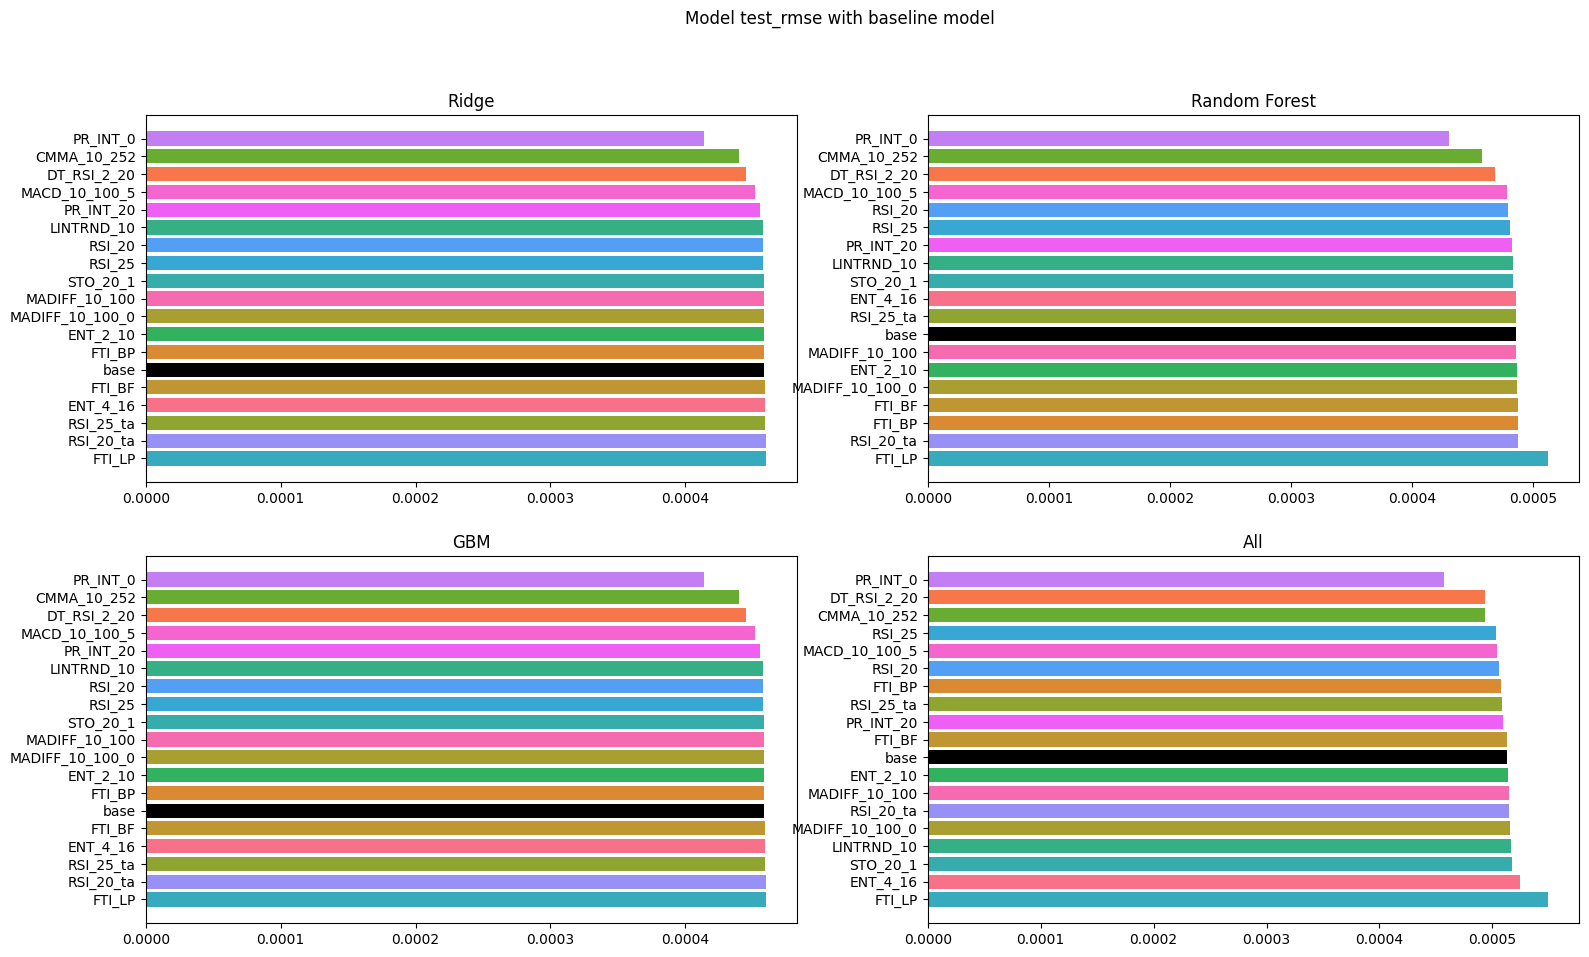

In [169]:
plot_model_vs_baseline(df_model, key = 'test_rmse')
# plt.savefig('../imgs/model_baseline_rmse.png')

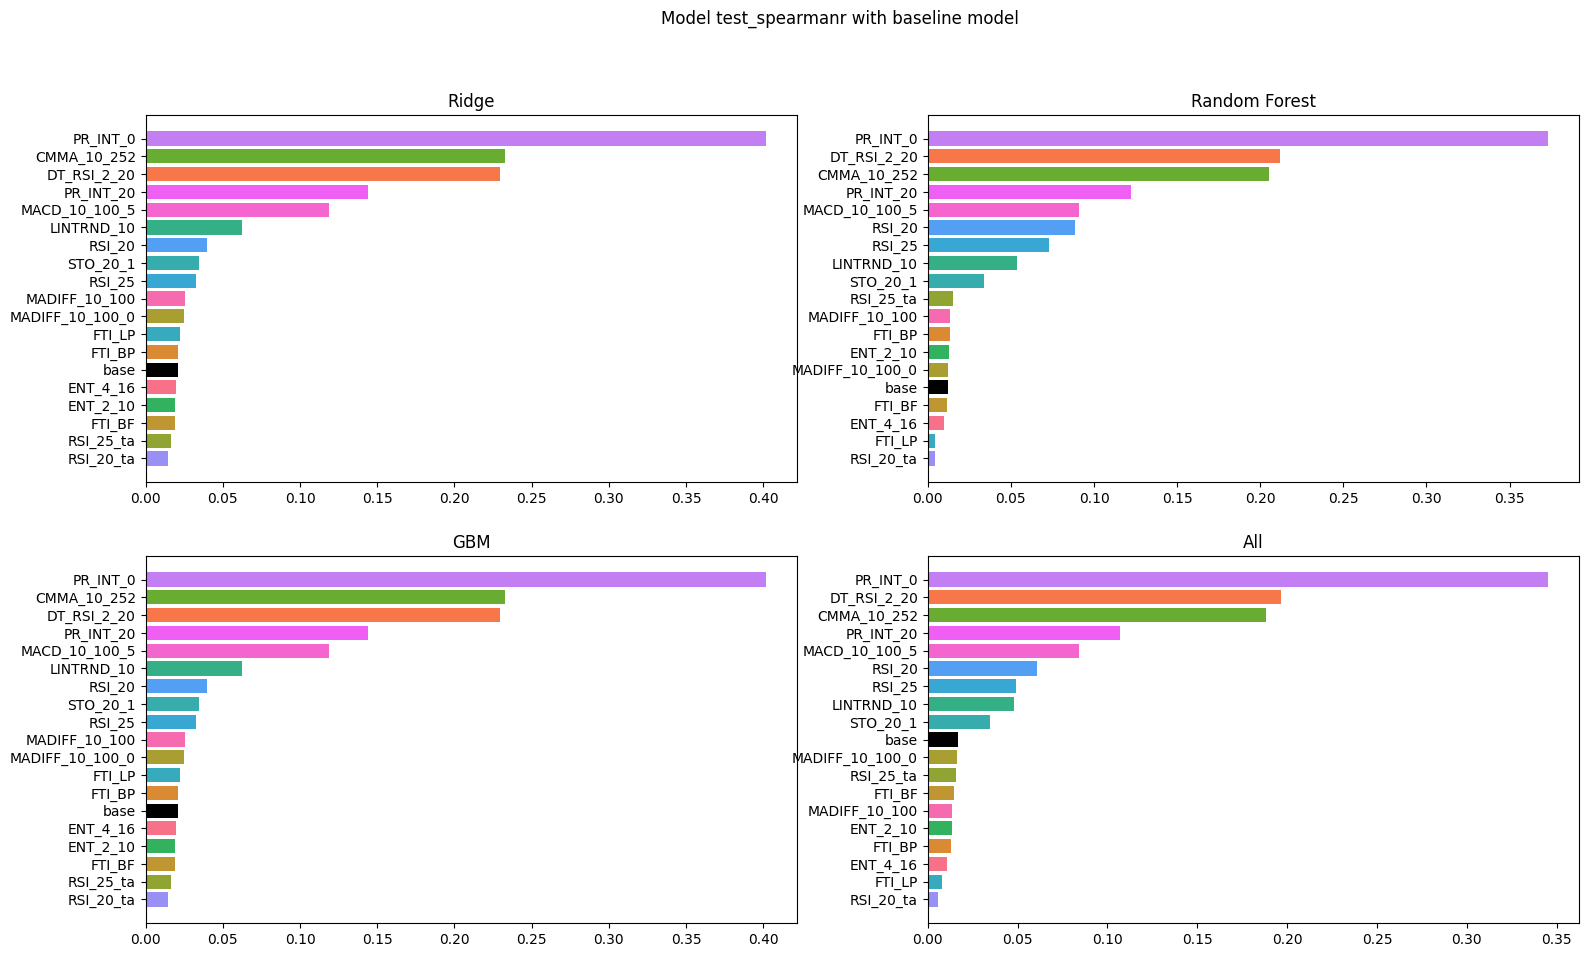

In [170]:
plot_model_vs_baseline(df_model, key = 'test_spearmanr',ascending=True)
# plt.savefig('../imgs/model_baseline_spearmanr.png')

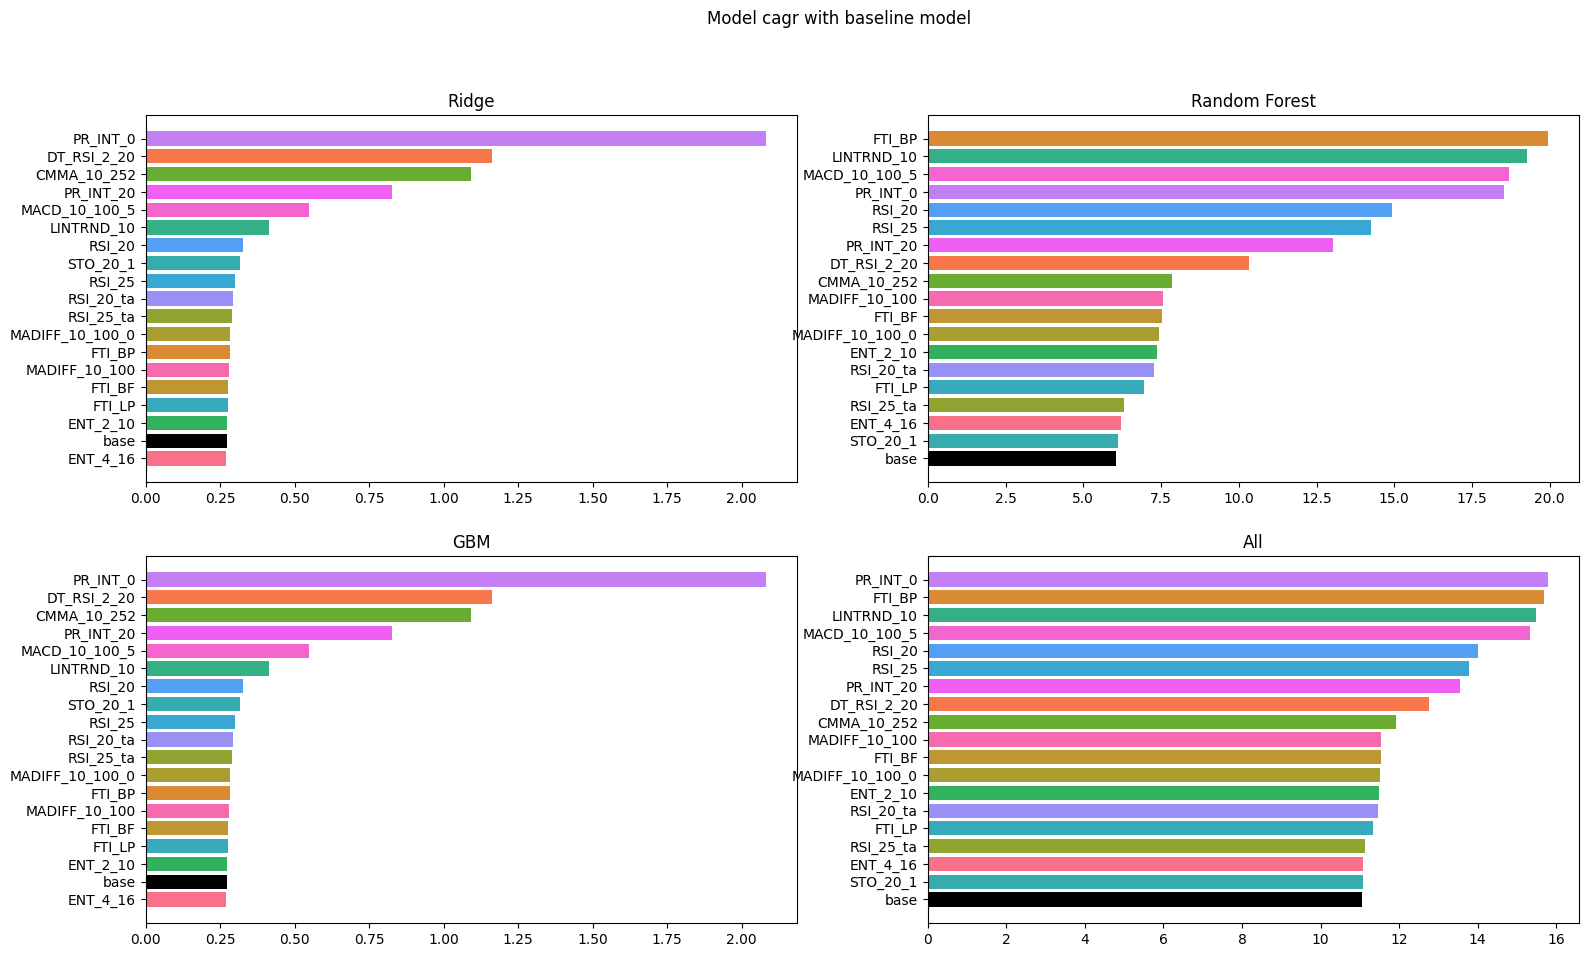

In [171]:
plot_model_vs_baseline(df_model, key = 'cagr',ascending=True)
# plt.savefig('../imgs/model_baseline_cagr.png')

In [172]:
df_model.columns

Index(['col', 'tuning_sharpe', 'tuning_rmse', 'tuning_spearmanr', 'cagr',
       'train_sharpe_ratio', 'calmar', 'test_spearmanr', 'test_sharpe',
       'test_rmse', 'model_name', 'ticker_name', 'tuning_sharpe_rank',
       'tuning_rmse_rank', 'tuning_spearmanr_rank', 'cagr_rank',
       'train_sharpe_ratio_rank', 'calmar_rank', 'test_spearmanr_rank',
       'test_sharpe_rank', 'test_rmse_rank'],
      dtype='object')

# Timothy VS Talibs

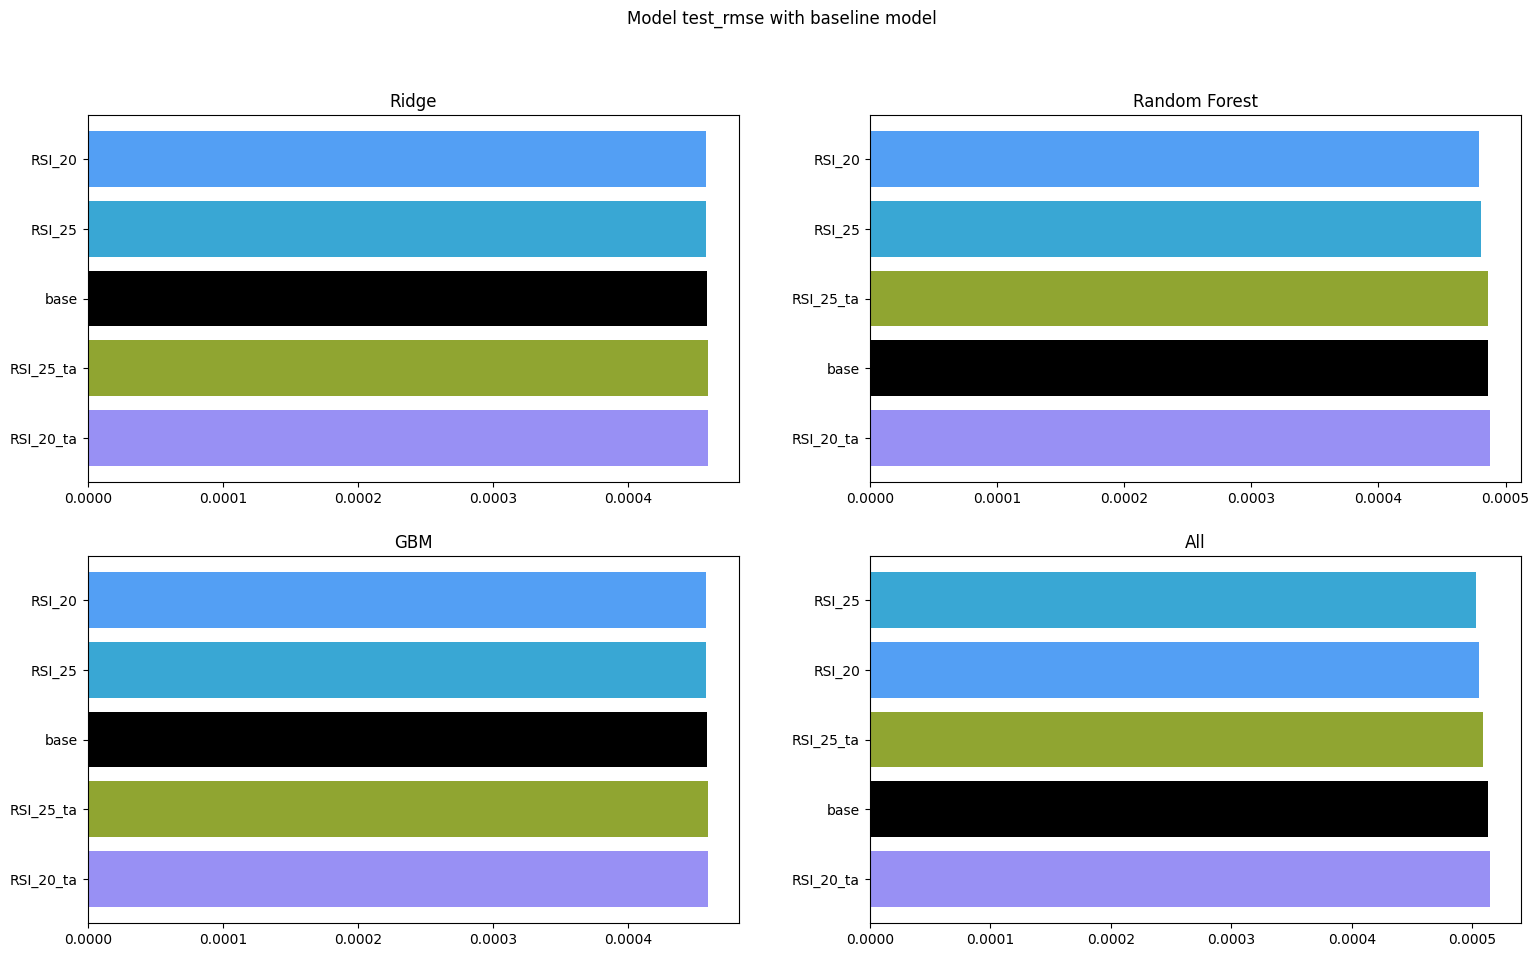

In [173]:
df_rsi = df_model[df_model['col'].isin(['base','RSI_20','RSI_25','RSI_20_ta','RSI_25_ta'])]
plot_model_vs_baseline(df_rsi, key = 'test_rmse')
# plt.savefig('../imgs/model_rsi_rmse.png')

In [320]:
df_model[df_model['ticker_name'] == 'OEX']

,col,tuning_sharpe,tuning_rmse,tuning_spearmanr,cagr,train_sharpe_ratio,calmar,test_spearmanr,test_sharpe,test_rmse,...,ticker_name,tuning_sharpe_rank,tuning_rmse_rank,tuning_spearmanr_rank,cagr_rank,train_sharpe_ratio_rank,calmar_rank,test_spearmanr_rank,test_sharpe_rank,test_rmse_rank
0,base,0.731787,-0.008642,0.016123,0.137482,0.985178,0.762756,-0.027862,0.135052,0.000123,...,OEX,1.0,10.0,12.0,16.0,16.0,14.0,14.0,8.0,9.0
1,RSI_20,0.516366,-0.008580,0.079149,0.307382,1.984911,1.535896,0.039182,0.355495,0.000121,...,OEX,9.0,8.0,7.0,8.0,8.0,7.0,7.0,4.0,14.0
2,RSI_20_ta,0.502694,-0.008645,0.008238,0.134569,0.966897,0.693549,-0.041839,0.140047,0.000123,...,OEX,10.0,13.0,19.0,18.0,18.0,19.0,19.0,7.0,2.0
3,RSI_25,0.585529,-0.008602,0.056403,0.254498,1.686466,1.271653,0.014134,0.417537,0.000122,...,OEX,3.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,13.0
4,RSI_25_ta,0.582568,-0.008643,0.011092,0.140823,1.006081,0.725781,-0.036890,0.200073,0.000123,...,OEX,4.0,11.0,18.0,14.0,14.0,17.0,18.0,5.0,3.0
5,DT_RSI_2_20,-0.101250,-0.007470,0.621294,1.625598,7.675616,9.841751,0.485152,-0.333967,0.000099,...,OEX,15.0,3.0,3.0,3.0,3.0,3.0,3.0,15.0,17.0
6,STO_20_1,0.544387,-0.008579,0.069701,0.317972,2.043457,1.494645,0.038235,0.407333,0.000122,...,OEX,7.0,7.0,8.0,7.0,7.0,8.0,8.0,3.0,12.0
7,MADIFF_10_100_0,0.478363,-0.008649,0.017262,0.160261,1.126614,0.889136,-0.023064,-0.017330,0.000122,...,OEX,12.0,17.0,10.0,10.0,10.0,10.0,11.0,14.0,10.0
8,MADIFF_10_100,0.478750,-0.008648,0.016964,0.152731,1.080146,0.781285,-0.021893,0.060080,0.000122,...,OEX,11.0,16.0,11.0,11.0,11.0,12.0,10.0,11.0,11.0
9,MACD_10_100_5,-0.750658,-0.007997,0.321696,1.011939,5.295889,4.060794,0.361316,0.479292,0.000109,...,OEX,19.0,5.0,5.0,5.0,5.0,5.0,4.0,1.0,16.0


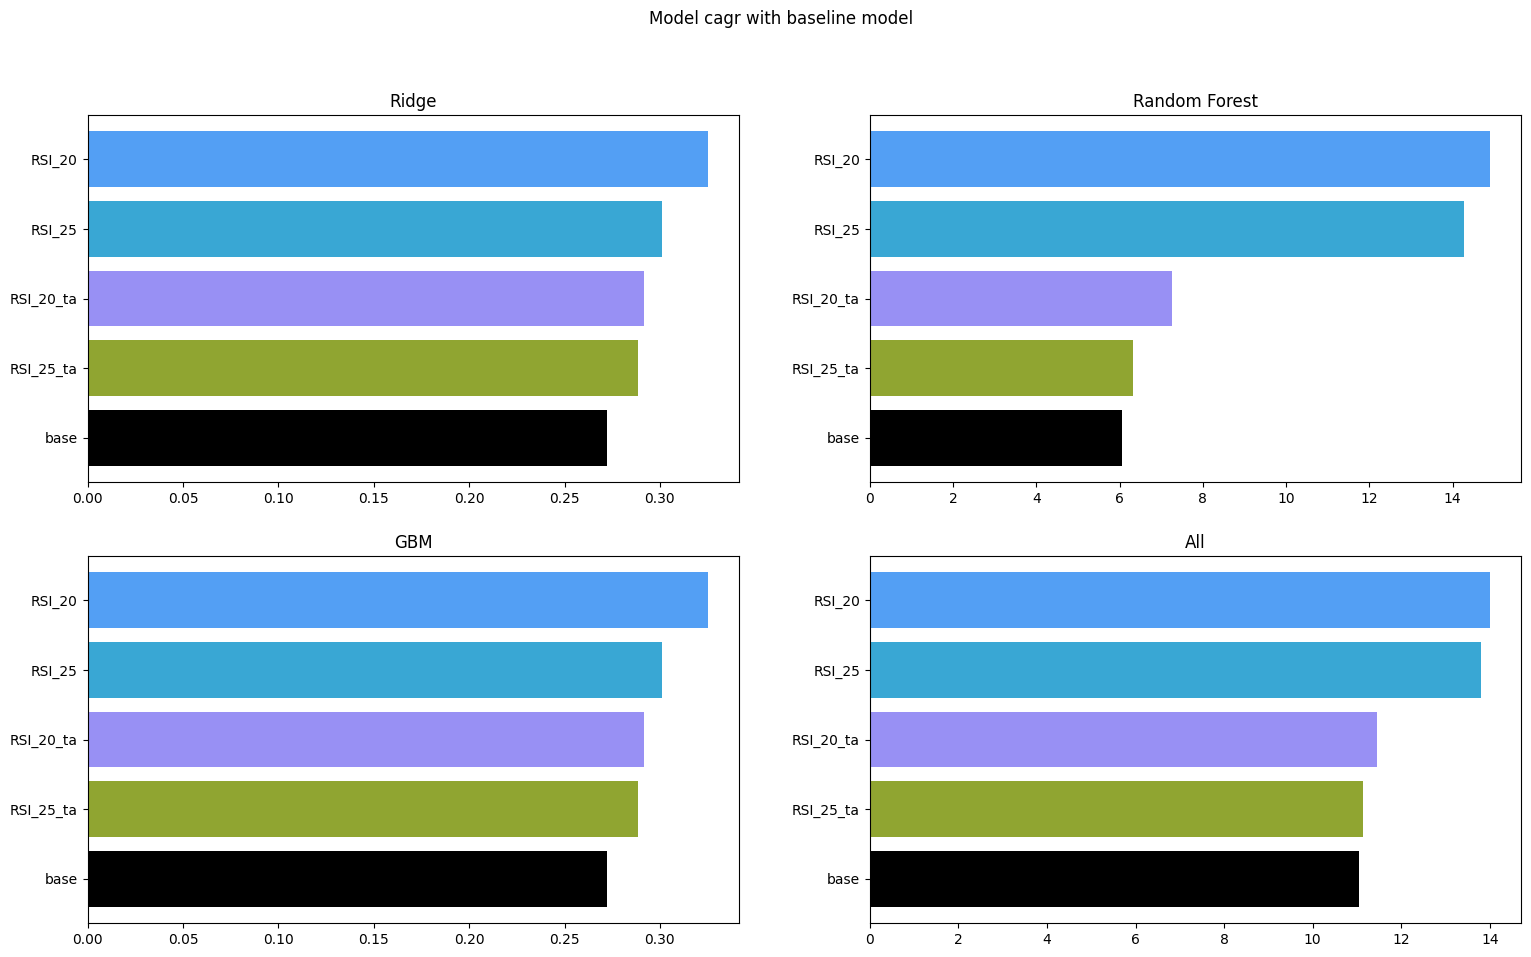

In [174]:
plot_model_vs_baseline(df_rsi, key = 'cagr', ascending=True)
# plt.savefig('../imgs/model_rsi_cagr.png')

In [189]:
df_3model = df_model.groupby(['model_name'])[['test_rmse','test_sharpe','test_spearmanr','cagr']].mean().sort_values(['test_sharpe'])
df_3model

,test_rmse,test_sharpe,test_spearmanr,cagr
model_name,,,,
gb,0.000593,0.014275,0.045373,26.800188
ridge,0.000454,0.177189,0.078870,0.518528
rf,0.000481,0.215276,0.071727,10.825860


### Comparing tickers

In [194]:
df_ticker = df_model.groupby(['ticker_name'])[['test_rmse','test_sharpe','test_spearmanr','cagr']].mean().sort_values(['test_sharpe'])
df_ticker[df_ticker['test_sharpe'] > 0]

,test_rmse,test_sharpe,test_spearmanr,cagr
ticker_name,,,,
RUT,0.000282,0.034746,0.113914,4.263050
TLT,0.000111,0.050602,0.014426,2.190546
CAT,0.000465,0.085968,0.024048,12.836367
SBUX,0.000372,0.159461,0.054621,6.652481
GS,0.000484,0.166590,0.060515,10.998498
NKE,0.000479,0.297749,0.068386,6.518023
JPM,0.000470,0.301461,0.078693,8.029123
MSFT,0.000307,0.378945,0.083351,6.802431
WMT,0.000216,0.408395,0.039938,3.299834


In [233]:
df_ticker = df_model.groupby(['ticker_name'])[['test_rmse','test_sharpe','test_spearmanr','cagr']].mean().sort_values(['test_sharpe'])
list_tickers = ['BA','BAC','RUT','TLT','TSLA']
df_ticker_selected = df_ticker[df_ticker.index.isin(list_tickers)]

In [236]:
df_ticker_selected

,test_rmse,test_sharpe,test_spearmanr,cagr
ticker_name,,,,
BA,0.001474,-0.360160,0.033993,8.642521
BAC,0.000684,-0.015224,0.030448,18.266364
RUT,0.000282,0.034746,0.113914,4.263050
TLT,0.000111,0.050602,0.014426,2.190546
TSLA,0.002387,0.686324,0.007508,120.433270


In [208]:
df_ticker_ind = df_model.groupby(['ticker_name','col'])[['test_rmse','test_sharpe','test_spearmanr','cagr']].mean().sort_values(['test_sharpe']).reset_index()
list_tickers = ['BA','BAC','RUT','TLT','TSLA']
df_ticker_ind = df_ticker_ind[df_ticker_ind['ticker_name'].isin(list_tickers)]

In [243]:
evaluation_list = [
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'TLT'},
    {'col': 'RSI_20_ta', 'model_name': 'rf', 'ticker_name': 'TLT'},
    {'col': 'FTI_BF', 'model_name': 'ridge', 'ticker_name': 'TLT'},
    {'col': 'RSI_20_ta', 'model_name': 'gb', 'ticker_name': 'TLT'},
    {'col': 'PR_INT_20', 'model_name': 'rf', 'ticker_name': 'TLT'},
    {'col': 'PR_INT_0', 'model_name': 'ridge', 'ticker_name': 'TLT'},
    {'col': 'base', 'model_name': 'ridge', 'ticker_name': 'TLT'},
    {'col': 'base', 'model_name': 'rf', 'ticker_name': 'TLT'},
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'TLT'},
    {'col': 'DT_RSI_2_20', 'model_name': 'gb', 'ticker_name': 'BA'},
    {'col': 'ENT_4_16', 'model_name': 'rf', 'ticker_name': 'BA'},
    {'col': 'RSI_25', 'model_name': 'ridge', 'ticker_name': 'BA'},
    {'col': 'MADIFF_10_100', 'model_name': 'gb', 'ticker_name': 'BA'},
    {'col': 'CMMA_10_252', 'model_name': 'rf', 'ticker_name': 'BA'},
    {'col': 'PR_INT_0', 'model_name': 'ridge', 'ticker_name': 'BA'},
    {'col': 'base', 'model_name': 'ridge', 'ticker_name': 'BA'},
    {'col': 'base', 'model_name': 'rf', 'ticker_name': 'BA'},
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'BA'},
    {'col': 'PR_INT_20', 'model_name': 'gb', 'ticker_name': 'RUT'},
    {'col': 'ENT_2_10', 'model_name': 'rf', 'ticker_name': 'RUT'},
    {'col': 'MADIFF_10_100_0', 'model_name': 'ridge', 'ticker_name': 'RUT'},
    {'col': 'STO_20_1', 'model_name': 'gb', 'ticker_name': 'RUT'},
    {'col': 'PR_INT_20', 'model_name': 'rf', 'ticker_name': 'RUT'},
    {'col': 'PR_INT_0', 'model_name': 'ridge', 'ticker_name': 'RUT'},
    {'col': 'base', 'model_name': 'ridge', 'ticker_name': 'RUT'},
    {'col': 'base', 'model_name': 'rf', 'ticker_name': 'RUT'},
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'RUT'},
    {'col': 'DT_RSI_2_20', 'model_name': 'gb', 'ticker_name': 'TSLA'},
    {'col': 'LINTRND_10', 'model_name': 'rf', 'ticker_name': 'TSLA'},
    {'col': 'RSI_20', 'model_name': 'ridge', 'ticker_name': 'TSLA'},
    {'col': 'ENT_4_16', 'model_name': 'gb', 'ticker_name': 'TSLA'},
    {'col': 'PR_INT_0', 'model_name': 'rf', 'ticker_name': 'TSLA'},
    {'col': 'PR_INT_0', 'model_name': 'ridge', 'ticker_name': 'TSLA'},
    {'col': 'base', 'model_name': 'ridge', 'ticker_name': 'TSLA'},
    {'col': 'base', 'model_name': 'rf', 'ticker_name': 'TSLA'},
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'TSLA'},
    {'col': 'DT_RSI_2_20', 'model_name': 'gb', 'ticker_name': 'BAC'},
    {'col': 'LINTRND_10', 'model_name': 'rf', 'ticker_name': 'BAC'},
    {'col': 'RSI_20', 'model_name': 'ridge', 'ticker_name': 'BAC'},
    {'col': 'ENT_4_16', 'model_name': 'gb', 'ticker_name': 'BAC'},
    {'col': 'PR_INT_0', 'model_name': 'rf', 'ticker_name': 'BAC'},
    {'col': 'PR_INT_0', 'model_name': 'ridge', 'ticker_name': 'BAC'},
    {'col': 'base', 'model_name': 'ridge', 'ticker_name': 'BAC'},
    {'col': 'base', 'model_name': 'rf', 'ticker_name': 'BAC'},
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'BAC'}
    ]

In [295]:
xx = [ df_model[(df_model[list(i)] == pd.Series(i)).all(axis=1)]  for i in evaluation_list]

df_shap = pd.concat(xx)[['col','model_name','ticker_name','test_rmse','test_spearmanr','cagr']].sort_values(['cagr'])


,col,model_name,ticker_name,test_rmse,test_spearmanr,cagr
0,base,ridge,TLT,0.000098,0.043419,0.159514
18,FTI_BF,ridge,TLT,0.000098,0.040009,0.171024
11,PR_INT_0,ridge,TLT,0.000097,0.160641,0.408563


In [ ]:
import antropy as ant


In [308]:

def calc_entropy(one_ticker, one_model, one_col, two_col):

    tlt_data =  pd.read_csv(f'../data/{one_ticker}_full.csv')
    print(f'{one_col} has antropy: ', ant.perm_entropy(tlt_data[one_col], normalize=True))
    print(f'{two_col} has antropy: ', ant.perm_entropy(tlt_data[two_col], normalize=True))

    res = df_shap[ (df_shap['model_name'] == one_model) & (df_shap['ticker_name'] == one_ticker)].sort_values('cagr')
    return(res)


In [309]:
one_ticker = 'TLT'
one_model = 'ridge'
one_col = 'PR_INT_0'
two_col = 'FTI_BF'
calc_entropy(one_ticker, one_model, one_col, two_col)

PR_INT_0 has antropy:  0.9917353504559827
FTI_BF has antropy:  0.8545046825436909


,col,model_name,ticker_name,test_rmse,test_spearmanr,cagr
0,base,ridge,TLT,0.000098,0.043419,0.159514
18,FTI_BF,ridge,TLT,0.000098,0.040009,0.171024
11,PR_INT_0,ridge,TLT,0.000097,0.160641,0.408563


In [310]:
one_ticker = 'RUT'
one_model = 'rf'
one_col = 'PR_INT_20'
two_col = 'ENT_2_10'
calc_entropy(one_ticker, one_model, one_col, two_col)

PR_INT_20 has antropy:  0.9555403559075568
ENT_2_10 has antropy:  0.7243623099709542


,col,model_name,ticker_name,test_rmse,test_spearmanr,cagr
33,ENT_2_10,rf,RUT,0.000273,0.055399,1.602601
19,base,rf,RUT,0.000275,0.042712,1.671536
31,PR_INT_20,rf,RUT,0.000292,0.177417,3.177252


In [311]:
one_ticker = 'TSLA'
one_model = 'gb'
one_col = 'DT_RSI_2_20'
two_col = 'ENT_4_16'
calc_entropy(one_ticker, one_model, one_col, two_col)

DT_RSI_2_20 has antropy:  0.9492636949761665
ENT_4_16 has antropy:  0.839024900985096


,col,model_name,ticker_name,test_rmse,test_spearmanr,cagr
38,base,gb,TSLA,0.002615,-0.021255,283.581751
43,DT_RSI_2_20,gb,TSLA,0.002873,-0.009498,283.650209
53,ENT_4_16,gb,TSLA,0.002952,-0.008993,283.650209


In [319]:
df_model[ (df_model['ticker_name'] == 'NDX')].sort_values('cagr')[['col','model_name','ticker_name','test_rmse','test_spearmanr','cagr']]#.sort_values(['test_rmse'])

,col,model_name,ticker_name,test_rmse,test_spearmanr,cagr
2,RSI_20_ta,ridge,NDX,0.000210,0.034401,0.177044
17,FTI_BP,ridge,NDX,0.000210,0.040933,0.189356
18,FTI_BF,ridge,NDX,0.000210,0.034773,0.192641
4,RSI_25_ta,ridge,NDX,0.000210,0.037738,0.203125
0,base,ridge,NDX,0.000210,0.040586,0.205673
15,ENT_4_16,ridge,NDX,0.000210,0.040595,0.207000
8,MADIFF_10_100,ridge,NDX,0.000209,0.045937,0.207436
14,ENT_2_10,ridge,NDX,0.000210,0.041179,0.212266
7,MADIFF_10_100_0,ridge,NDX,0.000209,0.044994,0.214096
6,STO_20_1,ridge,NDX,0.000208,0.070679,0.215013


#